# Naïve Bayes Classifiers

## Overview:
+ A simple, probabilistic classifier family, using Bayes' Theorem.
+ These classifiers are called “Naïve” because they assume that features are conditionally independent, given the class.
+ In other words: they assume that, for all instances of a given class, the features have little/no correlation.
+ Highly efficient learning and predictiontion with each other.
+ But generalization performance may worse than more sophisticated learning methods.
+ Can be competitive for some tasks (text classification).

### Bayes’ theorem 
Given a class variable y and a dependent feature vector x_1 through x_n, Bayes’ theorem states the following relationship:
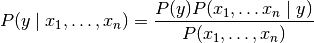
Using the naive independence assumption that


or all i, this relationship is simplified to

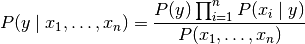

Since $P(x_1,x_2,...,x_n)$ is constant given the input, we can use the following classification rule:

$$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$

$$\Downarrow$$

$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),$$

### Simple example of Bayes' Theorem

Let's look at a simple example to illustrate Bayes theorem. We have a dataset about whether an online music subscription customer churns and how long songs are listened most of the time (25%, 75%, and 100%, to make it simple). The data look like below:


In [1]:
import pandas as pd

In [4]:
c=[('25%','yes'),
   ('75%','no'),
   ('100%','no'),
   ('25%','yes'),
   ('75%','yes'),
   ('25%','yes'),
   ('25%','yes'),
   ('100%','no'),
   ('100%','no'),
   ('25%','no'),
   ('75%','yes'),
   ('75%','no'),
   ('100%','yes'),
   ('25%','yes')]

In [5]:
churn=pd.DataFrame(c,columns=['song_length','churn'])

In [6]:
churn

,song_length,churn
0,25%,yes
1,75%,no
2,100%,no
3,25%,yes
4,75%,yes
5,25%,yes
6,25%,yes
7,100%,no
8,100%,no
9,25%,no


In [7]:
pd.crosstab(churn.song_length,churn.churn,margins=True)

churn,no,yes,All
song_length,,,
100%,3,1,4
25%,1,5,6
75%,2,2,4
All,6,8,14


#### Using Bayes' theorem we can calculate the probability of churn(yes) when a customer listens 100% of songs most of the time.
$P(yes|100\%)=\frac{P(yes)*P(100\%|yes)}{P(100\%)}$

In [9]:
8/14

0.5714285714285714

The prior probability of churned customer is given by:

$P(yes)=8/14=0.57$

which means of all customers in the data, how many churned (stop subscription)

In [10]:
1/8

0.125

The prior probability of 100% of song listend given churned customer is:

$P(100\%|yes)=1/8=0.13$

which means of all churned customers, how many of them listened the songs 100% most of time.

In [11]:
4/14

0.2857142857142857

The prior probability of 100% of song listened is:

$P(100\%)=4/14=0.29$

which means of all customers, how many of them listened songs 100% most of the time.

In [12]:
0.57*0.13/0.29

0.25551724137931037

Then, posterior probability of a customer churns if he or she listened the songs 100% most of the time is:

$P(yes|100\%)=\frac{P(yes)*P(100\%|yes)}{P(100\%)}=0.57*0.13/0.29=0.26$


**Now, calculate the posterior probability of a customer churns if he or she listened the songs 25% most of the time:**

In [22]:
pyes = 5/8

In [18]:
total = 6/14
t_yes = 8/14

In [20]:
(t_yes*pyes)/total

0.8333333333333333

## Naïve Bayes classifier types

+ Gaussian: It is used in classification and it assumes that features follow a normal distribution, and features are continuous/real-valued 

+ Bernoulli: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

+ Multinomial: It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

### Gaussian Naive Bayes
GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:

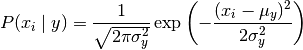

In [17]:
from sklearn import datasets
iris = datasets.load_iris()
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"
      % (iris.data.shape[0],(iris.target != y_pred).sum()))
print("Accuracy score is: {}".format((iris.target == y_pred).mean()))

Number of mislabeled points out of a total 150 points : 6
Accuracy score is: 0.96


### Bernoulli Naive Bayes
BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; for example, in the document classification, each word can be a feature (column), the values are 1s & 0s, which means “word occurs in the document” and “word does not occur in the document” respectively.

In [22]:
import numpy as np
X = np.random.randint(2, size=(6, 100))
Y = np.array([1, 2, 3, 4, 4, 5])
print(X)
print(Y)

[[0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1
  0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0
  0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0]
 [1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1
  1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1
  0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1]
 [0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1
  0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1
  1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0]
 [1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0
  0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0
  1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1]
 [0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1
  0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 1 

In [23]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, Y)

print(clf.predict(X[2:3]))


[3]


###  Multinomial Naive Bayes
MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice). For example, let’s say, we have a text classification problem. Here we can consider bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

In [19]:
import numpy as np
X = np.random.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
print(X)
print(y)

[[2 3 2 2 1 2 4 4 4 2 2 2 4 2 2 4 1 3 1 3 1 0 0 0 2 2 4 2 2 3 2 2 3 4 0 3 0
  4 0 4 2 4 1 3 3 2 1 1 1 0 0 2 1 4 3 4 3 1 2 0 3 4 3 0 1 0 3 1 0 3 1 3 3 3
  0 3 1 4 2 3 1 1 0 1 0 2 1 2 3 2 0 2 1 4 1 4 2 0 4 4]
 [0 0 0 2 0 3 0 0 1 0 3 3 1 0 0 4 3 2 3 0 3 0 2 1 4 2 1 3 4 2 4 2 2 4 0 0 4
  0 1 2 3 0 3 2 4 4 1 2 3 4 0 0 4 3 3 4 1 0 4 3 4 0 2 2 1 3 3 3 4 1 3 2 3 2
  2 2 3 3 1 2 1 3 0 0 3 3 3 4 3 0 1 2 1 4 0 3 3 0 4 0]
 [2 2 4 2 2 0 2 0 1 4 0 2 1 4 1 4 2 2 3 2 0 2 2 0 2 1 1 3 4 4 2 4 4 0 0 2 4
  0 4 4 4 1 2 2 1 4 0 3 0 3 3 0 2 0 3 1 1 1 2 2 1 2 2 0 1 2 2 2 4 4 1 0 0 2
  0 0 1 2 1 3 1 4 0 2 3 2 2 1 4 4 0 1 3 4 1 0 2 3 2 0]
 [1 4 4 1 3 4 1 3 0 2 1 1 2 2 4 1 2 4 2 1 3 4 1 0 4 0 0 0 0 1 0 4 0 0 1 0 4
  1 4 4 0 1 3 3 1 4 0 2 2 4 4 3 4 3 4 0 1 2 0 2 3 1 0 4 1 2 4 2 0 3 3 1 1 0
  3 0 2 2 1 2 4 0 3 3 0 3 2 1 4 1 2 0 0 4 3 3 2 2 3 3]
 [1 3 4 3 2 3 2 1 4 2 0 3 0 0 0 3 4 4 1 0 0 2 1 4 4 3 1 2 1 0 1 2 3 3 2 2 2
  2 0 2 1 3 4 3 3 3 0 1 2 1 4 3 2 4 3 1 1 3 0 3 4 3 3 0 2 0 0 1 0 3 2 2 0 3
  0 3 4 2 0 1 0 3 3 

In [20]:
X[2:3]

array([[2, 2, 4, 2, 2, 0, 2, 0, 1, 4, 0, 2, 1, 4, 1, 4, 2, 2, 3, 2, 0, 2,
        2, 0, 2, 1, 1, 3, 4, 4, 2, 4, 4, 0, 0, 2, 4, 0, 4, 4, 4, 1, 2, 2,
        1, 4, 0, 3, 0, 3, 3, 0, 2, 0, 3, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2,
        2, 2, 4, 4, 1, 0, 0, 2, 0, 0, 1, 2, 1, 3, 1, 4, 0, 2, 3, 2, 2, 1,
        4, 4, 0, 1, 3, 4, 1, 0, 2, 3, 2, 0]])

In [21]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)

print(clf.predict(X[2:3]))

[3]


## Pros and Cons of Naive Bayes classifiers

### Pros:
+ Easy to understand
+ Simple, efficient parameter estimation
+ Works well with high-dimensional data
+ When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
+ Often useful as a baseline comparison against more sophisticated methods

### Cons:
+ Assumption that features are conditionally independent given the class is not realistic.
+ As a result, other classifier types often have better generalization performance.
+ Their confidence estimates for predictions are not very accurate.

## 4 Applications of Naive Bayes Algorithms
+ Real time Prediction: Naive Bayes is an eager learning classifier and it is sure fast. Thus, it could be used for making predictions in real time.
+ Multi class Prediction: This algorithm is also well known for multi class prediction feature. Here we can predict the probability of multiple classes of target variable.
+ Text classification/ Spam Filtering/ Sentiment Analysis: Naive Bayes classifiers mostly used in text classification (due to better result in multi class problems and independence rule) have higher success rate as compared to other algorithms. As a result, it is widely used in Spam filtering (identify spam e-mail) and Sentiment Analysis (in social media analysis, to identify positive and negative customer sentiments)
+ Recommendation System: Naive Bayes Classifier and Collaborative Filtering together builds a Recommendation System that uses machine learning and data mining techniques to filter unseen information and predict whether a user would like a given resource or not

## Tips to improve the power of Naive Bayes Model
Here are some tips for improving power of Naive Bayes Model:

+ If continuous features do not have normal distribution, we should use transformation or different methods to convert it in normal distribution.
+ If test data set has zero frequency issue, apply smoothing techniques “Laplace Correction” to predict the class of test data set.
+ Remove correlated features, as the highly correlated features are voted twice in the model and it can lead to over inflating importance.
+ Naive Bayes classifiers has limited options for parameter tuning like alpha=1 for smoothing, fit_prior=[True|False] to learn class prior probabilities or not and some other options. I would recommend to focus on your  pre-processing of data and the feature selection.
+ You might think to apply some classifier combination technique like ensembling, bagging and boosting but these methods would not help. Actually, “ensembling, boosting, bagging” won’t help since their purpose is to reduce variance. Naive Bayes has no variance to minimize.